# ML Pipeline

As Data Scientist, we just have to Machine Learning models. We sit down, think about a problem in the world, how to solve it using Machine Learning or any kind of Artificial Intelligence and then just do it.  

Obviusly no one belived what I just said. We now that the data science world is about data, and most of our time will be dedicated to clean and treat data. The models are just the last part. That is why we have to design reusable ML pipelines, which ensures that the data will be treated always in the same manner and will produce the same result. 

![Anaconda_1.png](Anaconda_1.png)

In this notebook we are going to take a look at a ML Pipeline, but mostly at the data cleaning and preprocessing part.

![Data Centric AI](data-centric-ai.png)

### Now, our dataset! Today will be all about penguins!

![](https://camo.githubusercontent.com/1d187452ac3929cfde8f5760b79f37cc117c1a332227d37a8c50db50d3db632a/68747470733a2f2f616c6c69736f6e686f7273742e6769746875622e696f2f70616c6d657270656e6775696e732f7265666572656e63652f666967757265732f6c7465725f70656e6775696e732e706e67)

In [167]:
%pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [168]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins_raw,load_penguins
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
sns.set_style('whitegrid')

In [169]:
penguins_raw = load_penguins_raw()
penguins_raw.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


## A little bit of Data Exploration

In [170]:
penguins_raw.tail()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN
343,PAL0910,68,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A2,Yes,2009-11-21,50.2,18.7,198.0,3775.0,FEMALE,9.39305,-24.25255,NaN


We can begin with some data exploration, to check what kind of information we have, the types, the missing values, what classes do we have, etc.

In [171]:
# TODO Check how many penguins do we have per species

penguins_raw.groupby(["Species"])["Species"].value_counts()

Species                                    Species                                  
Adelie Penguin (Pygoscelis adeliae)        Adelie Penguin (Pygoscelis adeliae)          152
Chinstrap penguin (Pygoscelis antarctica)  Chinstrap penguin (Pygoscelis antarctica)     68
Gentoo penguin (Pygoscelis papua)          Gentoo penguin (Pygoscelis papua)            124
Name: Species, dtype: int64

In [172]:
#TODO do all penguins belonging to the same species come from the same island ?
penguins_raw.groupby(["Species"])[["Species","Island"]].value_counts()

Species                                    Island   
Adelie Penguin (Pygoscelis adeliae)        Dream         56
                                           Torgersen     52
                                           Biscoe        44
Chinstrap penguin (Pygoscelis antarctica)  Dream         68
Gentoo penguin (Pygoscelis papua)          Biscoe       124
dtype: int64

In [173]:
#TODO What kind of data do we have in the dataset?
penguins_raw.shape
print("Numbers of rows: ", penguins_raw.shape[0])
print("Numbers of columns: ", penguins_raw.shape[1])

penguins_raw.describe()

Numbers of rows:  344
Numbers of columns:  17


,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [174]:
categorical_columns=penguins_raw.drop(columns=penguins_raw.describe().columns)
for i in categorical_columns.columns:
    print("For the column ",i, " we can have:")
    a=categorical_columns[i].value_counts()
    print(a)

For the column  studyName  we can have:
PAL0910    120
PAL0809    114
PAL0708    110
Name: studyName, dtype: int64
For the column  Species  we can have:
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64
For the column  Region  we can have:
Anvers    344
Name: Region, dtype: int64
For the column  Island  we can have:
Biscoe       168
Dream        124
Torgersen     52
Name: Island, dtype: int64
For the column  Stage  we can have:
Adult, 1 Egg Stage    344
Name: Stage, dtype: int64
For the column  Individual ID  we can have:
N61A2     3
N29A2     3
N22A1     3
N22A2     3
N23A1     3
         ..
N84A2     1
N84A1     1
N83A2     1
N83A1     1
N100A2    1
Name: Individual ID, Length: 190, dtype: int64
For the column  Clutch Completion  we can have:
Yes    308
No      36
Name: Clutch Completion, dtype: int64
For the column  Date Egg  we can have:
2007-11-27    18
2008

C:\Users\wdmoreno\AppData\Local\Temp\ipykernel_1324\1675287658.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=penguins_raw.corr ()


<AxesSubplot: >

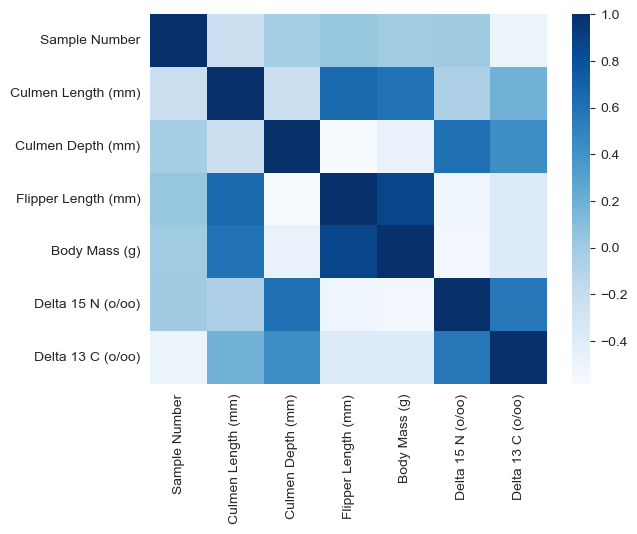

In [175]:
#TODO What kind of projects can be done with this dataset?

corr=penguins_raw.corr ()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap="Blues")

## Data Cleaning

In [176]:
#TODO Check which attributes have missing values 

missing_values = penguins_raw.isnull().sum()
print(missing_values)

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               290
dtype: int64


In [177]:
percent_missing = (missing_values / len(penguins_raw)) * 100
missing_data = pd.concat([missing_values, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.sort_values('Percent', ascending=False)
print(missing_data)


                     Total    Percent
Comments               290  84.302326
Delta 15 N (o/oo)       14   4.069767
Delta 13 C (o/oo)       13   3.779070
Sex                     11   3.197674
Culmen Length (mm)       2   0.581395
Body Mass (g)            2   0.581395
Flipper Length (mm)      2   0.581395
Culmen Depth (mm)        2   0.581395
studyName                0   0.000000
Sample Number            0   0.000000
Clutch Completion        0   0.000000
Individual ID            0   0.000000
Stage                    0   0.000000
Island                   0   0.000000
Region                   0   0.000000
Species                  0   0.000000
Date Egg                 0   0.000000


There are multiple ways for dealing with missing values.
- Drop the rows that contain missing values
- Imputation: Filling in the missing values
- Model-based procedures
- Weighting

Droping the rows that contain missing values is ok, if the data that is missing is completly at random and there are not that many missing rows. But when data is not missing at random and we drop those rows, we biased the dataset, thus, the results.  
Imputation usually uses some statistical method, like the mean for numerical columns or the mode for catogorical columns. This will reduce the variability of the attribute.   
Using models and predictions for filling those values may work poorly if the data must be extrapolated.  
Weighting refers to fill with a value, that takes into account the group and the sample distribution. We take into account that our dataset has more rows from the group X than the group Y, it is unbalanced. So we weight the points, so we have a better data point, according to the group.

One key aspect is to be careful, so that our results are not just artifacts caused by our imputation. 

Can you name any case where the missing values are useful?

If we are looking to clean the data, we have to check both rows and columns. The order depends on the dataset and the context, but we usually drop first the columns that are not relevant to our analysis, and then drop the rows that contain missing values. The reasoning is that if we do that in the other way around, we might drop missing rows that do not contain information in an attribute that does not matter, then we would lose information.

One way we can tell that one column does not add information is when the whole column just have a constant value, which does not add anything for predictions. Another one is they are identifiers, each value is different, but they do not tell us anything or do no have any pattern. 

### Categorical to numeric

Most models work with quantitative data. They cannot accept a category or a label for the training. We can do two things, transform the categories with one hot enconding or to a representation, giving a number to each category. The second option is not advisable, since the assigned value given to each category is just a representation, but in numbers, it can imply order or magnitude. For example, if I say that "dog" is 5 and "cat" is 0, does that mean that dog is better than cat? It has a higher value. What if our model learns that? On the other hand, if we use "dog" as 1 and "cat" as 0, but as the labels of the predicted variable, then we are good. 
One-hot-encoding will create n columns, one for each category, and it will have the value of 1 or 0 if the row has that attribute or not. As the model creates n columns, we can discard one of them, since it is the complement of the others and therefore, does not add any new information.

In [178]:
#TODO Get just the year from the date 
penguins_raw['Date Egg']=pd.to_datetime(penguins_raw['Date Egg'])
penguins_raw['Year'] = penguins_raw['Date Egg'].dt.strftime('%Y')
penguins_raw

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Year
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.,2007
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN,2007
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN,2007
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.,2007
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN,2009
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.,2009
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.,2009
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN,2009


In [179]:
#TODO We have 17 columns on the data set. Eliminate the columns that do not add any relevant information. 

print("Original data\n")
print("Numbers of rows: ", penguins_raw.shape[0])
print("Numbers of columns: ", penguins_raw.shape[1])

df1=penguins_raw.drop(['Comments','Region','Individual ID'], axis=1)

print("After delete column Comments\n")
print("Numbers of rows: ", df1.shape[0])
print("Numbers of columns: ", df1.shape[1])

#TODO Deal with the missing data. Check how many records do you have that are missing some information, and select a strategy.

df2 = df1.dropna(how='any')

print("\nAfter delete all empty rows\n")
print("Numbers of rows: ", df2.shape[0])
print("Numbers of columns: ", df2.shape[1])


print("\nPorcentage reduction data\n")
print("Reduction of rows: ", (1-(df2.shape[0]/penguins_raw.shape[0])))
print("Reduction of columns: ", (1-(df2.shape[1]/penguins_raw.shape[1])))

Original data

Numbers of rows:  344
Numbers of columns:  18
After delete column Comments

Numbers of rows:  344
Numbers of columns:  15

After delete all empty rows

Numbers of rows:  324
Numbers of columns:  15

Porcentage reduction data

Reduction of rows:  0.05813953488372092
Reduction of columns:  0.16666666666666663


In [180]:
#TODO Check again that there are no missing values in the dataset.

missing_values = df2.isnull().sum()
print(missing_values)


studyName              0
Sample Number          0
Species                0
Island                 0
Stage                  0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Year                   0
dtype: int64


In [181]:
#TODO Use one-hot-encoding for the sex column. How many columns do you need?
#Use pandas .get_dummies()

new_df = pd.get_dummies(df2['Sex'])

print(new_df)


     FEMALE  MALE
1         1     0
2         1     0
4         1     0
5         0     1
6         1     0
..      ...   ...
339       0     1
340       1     0
341       0     1
342       0     1
343       1     0

[324 rows x 2 columns]


## Data Exploration

Great! We have our dataset ready. We already eliminate non-informative columns and fill the missing values. Now we can explore more about the data. One important way of exploring it is through visualizations.


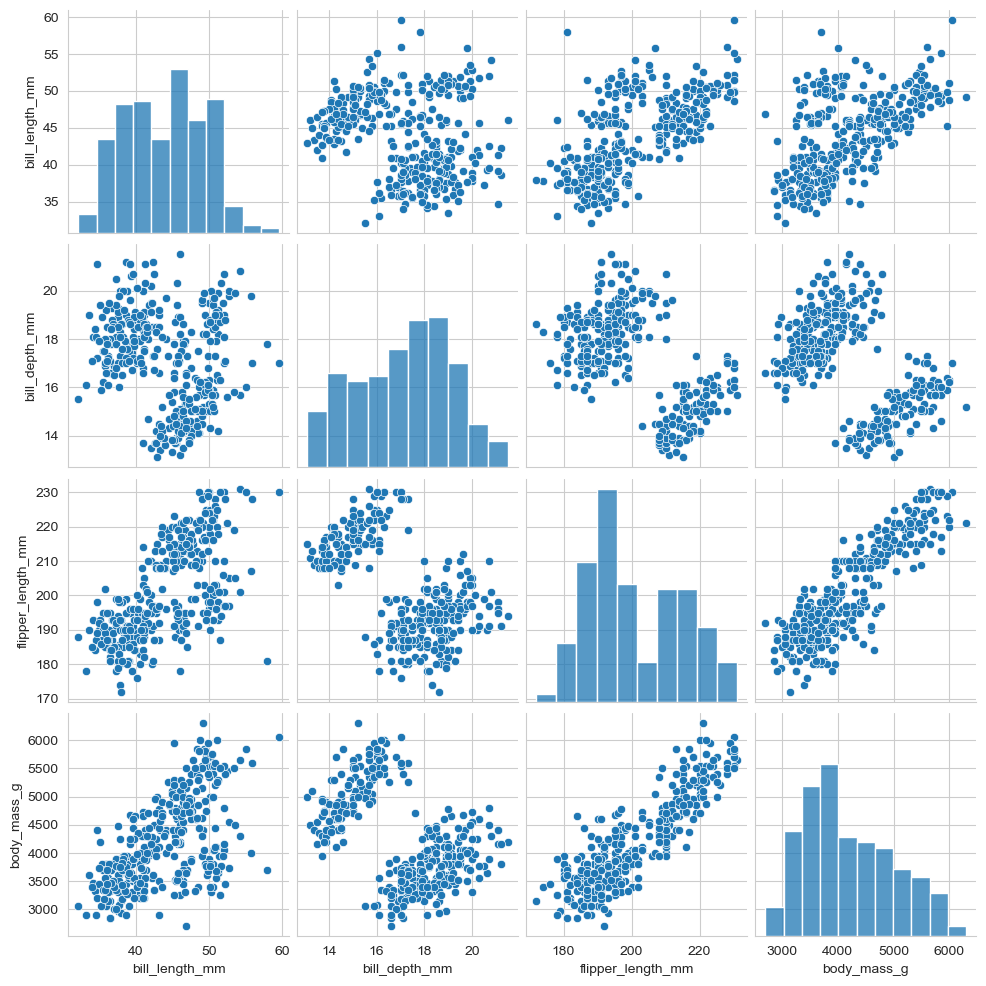

In [182]:
#TODO plot some variables or attributes agains each other, what can you tell from that? You can use seaborns pairplot

df2 = sns.load_dataset("penguins")
sns.pairplot(df2)

## PCA

Principal Component Analysis is a technique for dimensionality reduction. It is useful for reducing the size of a dataset. It is important since we want to optimize time and processing, but without the loss of relevant information.  
It will compute a number of new components, that explain the variability of the dataset. It is worth mentioning that the resulting components are not columns from the previous dataset, and we do not know which one they represent.  
It is unsupervised, which means that PCA does not need the target variable. It will also help us visualize data, given by our inability to comprehend high dimensional spaces. Then, we can reduce the dimensions to 2 or 3, which we can plot and understand. This last part usually only works for visualization, having just two components from a high dimensional dataset might not explain the variance.

In the previous plot, we had 4 or 5 plots, depending on your column selection. How many plots are comparing two attributes? Now imagine we have 10, 20 attributes, it is no longer feasable. The, we can do PCA to have a lower dimensional data, that still explains the original one.  

PCA tries to find the components were the observations vary the most. Each component will be linear combination of the features, with some weights learned, pretty much like a linear regression. The weights must add to 1, so that we can limit their scale. At the end, it is an optimization problem of finding those weights for each component. As all of them have the same optimization problem, all of them would result in the same vector or component. We can solve this by adding another constraint to the model, we want the components to be uncorrelated. 

There is just one problem. As many other unsupervised methods, the PCA needs a K hyperparameter. It tells the model how many components create. With a low K, we might end-up missing a lot of information, and with a large k, close to n (number of attributes), then we are not reducing enough the dimensionality. So, how can we determine that K? We can plot the explained variance for each possible k between 1 and n, and select the best k. Again, selecting the best k depends on the context. Usually we select the k were 99% percent of the variance is explained, without being to large. 

So we will have two metrics. The Proportion of Variance Explained (PVE) and the Cumulative Variance Explained.

In [183]:
from sklearn.decomposition import PCA

In [184]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [185]:
penguins_num = df2.select_dtypes(['float64'])

In [186]:
df2['species'].astype('category')

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: category
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

In [187]:
colors = df2['species'].astype('category').cat.codes.map({0:'orange',1:'violet',2:'blue'})

In [188]:
colors

0      orange
1      orange
2      orange
3      orange
4      orange
        ...  
339      blue
340      blue
341      blue
342      blue
343      blue
Length: 344, dtype: object

In [189]:
c = penguins_raw['Species'].astype('category').cat.codes
colors  = [f"C{i}" for i in np.arange(0, c.max()+1)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(0, c.max()+2), colors)

In [190]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(penguins_num)

sp_names =['Adelie','Chinstrap','Gentoo']
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=c,cmap=cmap,norm=norm)

plt.legend(handles=scatter.legend_elements()[0], 
           labels=sp_names,
           title="species")
plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Great! But let's plot the explained variance of the components, which is in which direction the components vary the most.

In [ ]:
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=c,cmap=cmap,norm=norm)
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.legend(handles=scatter.legend_elements()[0], 
           labels=sp_names,
           title="Species")
plt.show()

In [ ]:
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(penguins_num)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("PCA variance for unnormalized data")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

What just happened? With just one component we can explain all the variance in the dataset. Does that seems right?  
Here is the catch. PCA works with the variances, it looks for the direction of greater variance from the data. But when data is not scaled, just the attributes that have a greater unit of measure and higher values, will affect the variance. Attributes that have lower values, will not be taken into account. Therefore, we need to scale the data before applying PCA, where every attribute has 0 mean.

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_num)

In [ ]:
penguins_scaled_dt = pd.DataFrame(penguins_scaled, columns=penguins_num.columns)

In [ ]:
penguins_scaled_dt['Species'] = penguins_raw['Species']

In [ ]:
sns.pairplot(penguins_scaled_dt,hue='Species')

In [ ]:
c = penguins_raw['Species'].astype('category').cat.codes
colors  = [f"C{i}" for i in np.arange(0, c.max()+1)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(0, c.max()+2), colors)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(penguins_scaled)

sp_names =['Adelie','Chinstrap','Gentoo']
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=c,cmap=cmap,norm=norm)
plt.legend(handles=scatter.legend_elements()[0], 
           labels=sp_names,
           title="Species")
plt.show()

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(penguins_scaled)

sp_names =['Adelie','Chinstrap','Gentoo']
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=c,cmap=cmap,norm=norm)
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.legend(handles=scatter.legend_elements()[0], 
           labels=sp_names,
           title="Species")
plt.show()

In [ ]:
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(penguins_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("PCA variance for unnormalized data")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Better right? If we do not scale the data, we might lose relevant information. With the scaled data, we see better the components after PCA, and we can see that there is a penguin species very distinctive to the other two. But more than that, we see the pattern or direction in which the data are varying the most.   

Same with the number of components. Before scaling the data, we saw that it required only one component to explain all the variance, this was not correct. Instead, we now see that we need three components to explain all the variance, basically one component less than the 4 numerical columns that we are evaluating.